In [1]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [2]:
# importing data frame
concrete = pd.read_csv('concrete.csv')

concrete.drop('Unnamed: 0', axis=1, inplace=True)

concrete.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cement               1030 non-null   float64
 1   BlastFurnaceSlag     1030 non-null   float64
 2   FlyAsh               1030 non-null   float64
 3   Water                1030 non-null   float64
 4   Superplasticizer     1030 non-null   float64
 5   CoarseAggregate      1030 non-null   float64
 6   FineAggregate        1030 non-null   float64
 7   Age                  1030 non-null   int64  
 8   CompressiveStrength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
X = concrete[['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer','CoarseAggregate', 'FineAggregate', 'Age']]
y = concrete['CompressiveStrength']

In [5]:
X = sm.add_constant(X)

In [6]:
model = sm.OLS(y,X).fit()

In [7]:
predictions = model.predict(X)

In [8]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:              OLS                 Adj. R-squared:     0.613    
Dependent Variable: CompressiveStrength AIC:                7755.9240
Date:               2020-12-30 19:28    BIC:                7800.3598
No. Observations:   1030                Log-Likelihood:     -3869.0  
Df Model:           8                   F-statistic:        204.3    
Df Residuals:       1021                Prob (F-statistic): 6.29e-206
R-squared:          0.616               Scale:              108.14   
---------------------------------------------------------------------
                     Coef.   Std.Err.    t    P>|t|   [0.025   0.975]
---------------------------------------------------------------------
const               -23.3312  26.5855 -0.8776 0.3804 -75.4997 28.8373
Cement                0.1198   0.0085 14.1129 0.0000   0.1031  0.1365
BlastFurnaceSlag      0.1039   0.0101 10.2474 0.0000   0.0840  0.1238
FlyAsh                0.0879   0.0126  6.9882 0.0000   0.0632  0.1126
Water                -0.1499   0.0402 -3.7314 0.0002  -0.2288 -0.0711
Superplasticizer      0.2922   0.0934  3.1279 0.0018   0.1089  0.4755
CoarseAggregate       0.0181   0.0094  1.9257 0.0544  -0.0003  0.0365
FineAggregate         0.0202   0.0107  1.8867 0.0595  -0.0008  0.0412
Age                   0.1142   0.0054 21.0464 0.0000   0.1036  0.1249
---------------------------------------------------------------------
Omnibus:                5.378         Durbin-Watson:           1.282 
Prob(Omnibus):          0.068         Jarque-Bera (JB):        5.304 
Skew:                   -0.174        Prob(JB):                0.071 
Kurtosis:               3.045         Condition No.:           106075
=====================================================================
* The condition number is large (1e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

In [9]:
# Adjusted R Square : R Square tends to increase even if the additional input do not add any value to the model. Adjusted R ßquare compensates for it. 
# R Square measures the proportion of variability explained by feautre on the target. 

# R Square = 1 - (SSE/SST)
# Adjusted R Square = 1 - [(1-Rsquare)(n-1)/(n-k-1)]

# n : number of samples
# k : number of features

# Adj. R Sqaure pf 0.613 means 61 % of variatios in the increase in compresive strength is explained by the features used in the model

In [10]:
# AIC and BIC will be used when we have different models to compare.

# AIC determines the relative informational value of the model using the maximum likelihood estimation and number of features
# AIC = 2k - 2ln(L) where k is the number of features and L is the maximum likelihood estimation
# For a number of different model, AIC with the lowest value will be chosen as the best model

# BIC similar as AIC but based on Bayesian estimates. Similarly the lowest value be chosen.

In [11]:
# Std. Error of the variable measures how much uncertainity is asscoaited with each variable. Lower the better.
# t stat is coefficient / std. error. Cememnt stands 14 std. deviation from Zero. 
# p >|t| means the p value of each variable and how significant are these variables
# [0.025 0.975] : The range for confidence for each variable. For example in case of "age" , we are 95% confident that a one year increase in age 
# will correspond to 0.1026 and 0.1249 increase in compressive strength, while keeping other factors constant

In [12]:
# we can see from the above model that "Fine Aggregate" and "Coarse Aggregate" has p value much higher and 95% confidennce has 0 in the range. 
# Let's remove these two feature and run the model again to see if we improved.

In [13]:
X = concrete[['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer','Age']]
y = concrete['CompressiveStrength']
X = sm.add_constant(X)

In [14]:
model = sm.OLS(y,X).fit()

In [15]:
predictions = model.predict(X)

In [16]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:              OLS                 Adj. R-squared:     0.612    
Dependent Variable: CompressiveStrength AIC:                7755.9279
Date:               2020-12-30 19:28    BIC:                7790.4891
No. Observations:   1030                Log-Likelihood:     -3871.0  
Df Model:           6                   F-statistic:        271.2    
Df Residuals:       1023                Prob (F-statistic): 1.67e-207
R-squared:          0.614               Scale:              108.35   
---------------------------------------------------------------------
                      Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
---------------------------------------------------------------------
const                28.9930   4.2132   6.8815 0.0000 20.7255 37.2605
Cement                0.1054   0.0042  24.8248 0.0000  0.0971  0.1137
BlastFurnaceSlag      0.0865   0.0050  17.3854 0.0000  0.0767  0.0962
FlyAsh                0.0687   0.0077   8.8766 0.0000  0.0535  0.0838
Water                -0.2181   0.0211 -10.3215 0.0000 -0.2596 -0.1766
Superplasticizer      0.2403   0.0846   2.8417 0.0046  0.0744  0.4063
Age                   0.1135   0.0054  20.9880 0.0000  0.1029  0.1241
---------------------------------------------------------------------
Omnibus:               5.229          Durbin-Watson:            1.286
Prob(Omnibus):         0.073          Jarque-Bera (JB):         5.189
Skew:                  -0.174         Prob(JB):                 0.075
Kurtosis:              3.019          Condition No.:            4662 
=====================================================================
* The condition number is large (5e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [17]:
# The new model's Adjusted R Square is still same at 61 % so no improvements.
# The coefficient for "Cemenrt" is 0.1054 with 95% CI between 0.0971 and 0.1137 it means that with one unit increase in cement , the Compressive Strength increase by 0.1054
# Also the 95 % CI tells that if we repeat this procedure numerous times, around 95 % probablity that caluclated CI from some future experiments encompasses the value of cement coefficient 
# between 0.09 and 0.11

In [18]:
# SST : Sum of Square Total : Sum of Squared difference between the observed dependent variable and its mean of dependent variable
# SSR : Sum of Square due to Regression : Sum of the squared difference between the predicated value and mean of the dependent variable
# SSE : Sum of Square Error : Sum of squared between the observed value and the predicted value
# SST = SSE + SSR

In [19]:
concrete.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [20]:
# Let's see if we can improve model performance by "feature scaling" the features.

# Some machine learning models are more prne to get impacted through different scales for features. Examples are regression and neural network

# KNN, K Means and SVM uses distance between points to determine similarity hence they might also get impacted. 


# There are two main types of feature scaling 

# Normalization : Converts between 0 to 1. Also known as min max scaling.

# x norm = (x-min(x))/ (max(x)-min(x))

# Standardization : Converts values towards centered around mean with a unit standard deviation . Mean becomes zero 
# and resulting distribution has a unit standard deviation

# x` = (x-mu)/(sigma)

# mu is the mean and sigma is the standard deviation



In [21]:
# importing sklearn preprocessing to do min max scaling

from sklearn.preprocessing import MinMaxScaler

In [22]:
X = concrete[['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer','Age']]
y = concrete['CompressiveStrength']

In [23]:
min_max_scaler = MinMaxScaler()

In [24]:
X = pd.DataFrame(min_max_scaler.fit_transform(X.values), columns=X.columns,index=X.index)


In [25]:
X = sm.add_constant(X)

In [26]:
model = sm.OLS(y,X).fit()

In [27]:
predictions = model.predict(X)

In [28]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:              OLS                 Adj. R-squared:     0.612    
Dependent Variable: CompressiveStrength AIC:                7755.9279
Date:               2020-12-30 19:28    BIC:                7790.4891
No. Observations:   1030                Log-Likelihood:     -3871.0  
Df Model:           6                   F-statistic:        271.2    
Df Residuals:       1023                Prob (F-statistic): 1.67e-207
R-squared:          0.614               Scale:              108.35   
---------------------------------------------------------------------
                   Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
---------------------------------------------------------------------
const              13.2955   1.8359   7.2419 0.0000   9.6929  16.8981
Cement             46.1711   1.8599  24.8248 0.0000  42.5215  49.8207
BlastFurnaceSlag   31.0779   1.7876  17.3854 0.0000  27.5701  34.5856
FlyAsh             13.7389   1.5478   8.8766 0.0000  10.7018  16.7761
Water             -27.3047   2.6454 -10.3215 0.0000 -32.4957 -22.1136
Superplasticizer    7.7380   2.7231   2.8417 0.0046   2.3946  13.0814
Age                41.3110   1.9683  20.9880 0.0000  37.4486  45.1735
---------------------------------------------------------------------
Omnibus:               5.229          Durbin-Watson:            1.286
Prob(Omnibus):         0.073          Jarque-Bera (JB):         5.189
Skew:                  -0.174         Prob(JB):                 0.075
Kurtosis:              3.019          Condition No.:            14   
=====================================================================

"""

In [29]:
# As you can see there is no improvement in the model with "feature scaling"
# Probably we have features that we do not need. Although we did earlier by looking at p value. 
# Let's also make it work through some cool methods available to us through sklearn

In [30]:
# Feature Selection is done to get the following benefits.

# Curse of dimensionality : In this model , we have just 10 features but in many real life problesm we may have 100s if not 1000s of variables.
# Feature selection helps to remove the curse of dimensionality

# Overfitting reduction : Since we will not have multi-collinearity hence reduction in overfitting

# Accuracy : Model accuracy improves since less misleading data

In [31]:
from sklearn.feature_selection import SelectKBest, f_regression

In [32]:
test = SelectKBest(score_func=f_regression,k=5)

In [33]:
np.seterr(divide='ignore',invalid='ignore')
X_selected = test.fit(X,y)

In [34]:
cols = X_selected.get_support(indices=True)

In [35]:
new_feature = X.columns[cols]

In [36]:
new_feature

Index(['Cement', 'BlastFurnaceSlag', 'Water', 'Superplasticizer', 'Age'], dtype='object')

In [37]:
X.columns

Index(['const', 'Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water',
       'Superplasticizer', 'Age'],
      dtype='object')

In [38]:
# we can see that flyash has been removed as the feature. However we have used here the K as 5. What if k is not 5 and something else

In [39]:
# RFE : Recursive Feature Eliminition

In [40]:
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LinearRegression

In [41]:
model = LinearRegression()

In [42]:
rfe = RFE(estimator=model,n_features_to_select=5)

In [43]:
fit = rfe.fit(X,y)

In [44]:
cols = fit.get_support(indices=True)

In [45]:
new_feature = X.columns[cols]

In [46]:
new_feature

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Age'], dtype='object')

In [47]:
# based on RFE it seems that FlyAsh is better predictor

In [48]:
# let's use the grid search to identify number of good predictors

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression

In [49]:
kbest_estimators = SelectKBest(f_regression)

pipeline = Pipeline([('kbest', kbest_estimators),('linear',LinearRegression())])

In [50]:
grid_search = GridSearchCV(pipeline,{'kbest__k':[1,2,3,4,5,6,7]})

In [51]:
grid_search.fit(X,y)

GridSearchCV(estimator=Pipeline(steps=[('kbest',
                                        SelectKBest(score_func=<function f_regression at 0x7fac8abeadc0>)),
                                       ('linear', LinearRegression())]),
             param_grid={'kbest__k': [1, 2, 3, 4, 5, 6, 7]})

In [52]:
grid_search.best_estimator_

Pipeline(steps=[('kbest',
                 SelectKBest(k=7,
                             score_func=<function f_regression at 0x7fac8abeadc0>)),
                ('linear', LinearRegression())])

In [53]:
grid_search.best_params_

{'kbest__k': 7}

In [54]:
features = pipeline.named_steps['kbest']

In [55]:
# seems like the more number of feature you give the more it selects

In [56]:
# let's use one more technique to identify the feature importance

from sklearn.ensemble import ExtraTreesRegressor

In [57]:
model = ExtraTreesRegressor(n_estimators=100)

model.fit(X,y)

ExtraTreesRegressor()

In [58]:
model.feature_importances_

array([0.        , 0.27799469, 0.10670758, 0.04168393, 0.10976017,
       0.10210753, 0.36174609])

In [59]:
feats = {}

for feature, importance in zip(X.columns,model.feature_importances_):
    feats[feature] = importance


In [60]:
importance = pd.DataFrame.from_dict(feats,orient='index').rename(columns={0:'Pearson Relative importance'})

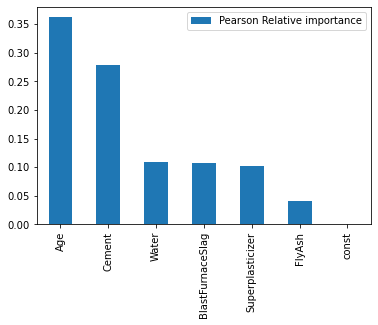

In [61]:
importance.sort_values(by='Pearson Relative importance',ascending=False).plot(kind='bar');

In [62]:
# let's also use RFECV to understand if we need all features

estimator = LinearRegression()

selector = RFECV(estimator,step=1,cv=5)

selector = selector.fit(X,y)

In [63]:
selector.support_

array([ True,  True,  True,  True,  True,  True,  True])

In [64]:
# seems like all of them got selected . Disapponting

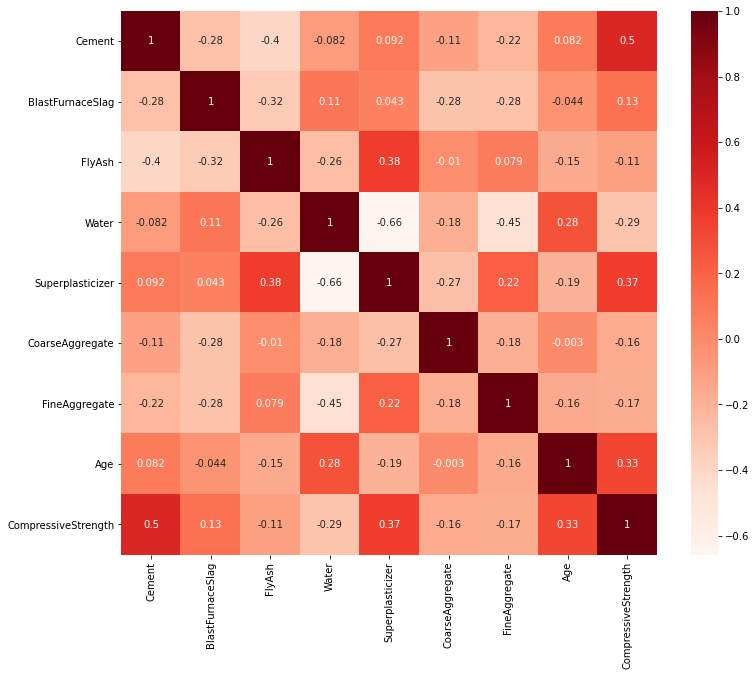

In [65]:
# let's see if we can use Pearson Correlation to understand the importance

plt.figure(figsize=(12,10))

cor = concrete.corr()

sns.heatmap(cor,annot=True, cmap=plt.cm.Reds)

plt.show()

In [66]:
# As we can see the highest correlation of compressive strength is with Cement on positive side and 
# Water on negative side

In [67]:
cor_target = abs(cor["CompressiveStrength"])

relevant_features = cor_target[cor_target>0.1]

In [68]:
relevant_features.sort_values(ascending=False)

CompressiveStrength    1.000000
Cement                 0.497832
Superplasticizer       0.366079
Age                    0.328873
Water                  0.289633
FineAggregate          0.167241
CoarseAggregate        0.164935
BlastFurnaceSlag       0.134829
FlyAsh                 0.105755
Name: CompressiveStrength, dtype: float64

In [69]:
from sklearn.linear_model import LassoCV, Lasso

In [70]:
from sklearn.feature_selection import SelectFromModel

In [71]:
selection = SelectFromModel(LinearRegression())

selection.fit(X,y)

SelectFromModel(estimator=LinearRegression())

In [72]:
selected_features = X.columns[(selection.get_support())]

In [73]:
selected_features

Index(['Cement', 'BlastFurnaceSlag', 'Water', 'Age'], dtype='object')

In [74]:
# Seems like only 3 of these guys got selected

In [75]:
X = concrete[['Cement', 'BlastFurnaceSlag', 'Age']]
y = concrete['CompressiveStrength']

X = sm.add_constant(X)

In [76]:
model = sm.OLS(y,X).fit()

In [77]:
print(model.summary2())

                   Results: Ordinary least squares
Model:              OLS                 Adj. R-squared:     0.413    
Dependent Variable: CompressiveStrength AIC:                8178.0129
Date:               2020-12-30 19:28    BIC:                8197.7621
No. Observations:   1030                Log-Likelihood:     -4085.0  
Df Model:           3                   F-statistic:        242.7    
Df Residuals:       1026                Prob (F-statistic): 5.25e-119
R-squared:          0.415               Scale:              163.70   
----------------------------------------------------------------------
                     Coef.   Std.Err.     t     P>|t|   [0.025  0.975]
----------------------------------------------------------------------
const                2.9212    1.3402   2.1796  0.0295  0.2913  5.5510
Cement               0.0889    0.0040  22.3444  0.0000  0.0811  0.0968
BlastFurnaceSlag     0.0583    0.0048  12.1202  0.0000  0.0489  0.0677
Age                  0.0784    0.

In [78]:
# However when we run the model , its R Sqaure is much less than previously build model

In [79]:
# Let's look at residuals of the model

from statsmodels.stats.outliers_influence import OLSInfluence

In [80]:
influence = OLSInfluence(model)

In [81]:
influence.cooks_distance

(0       0.008034
 1       0.000853
 2       0.010619
 3       0.035012
 4       0.006470
           ...   
 1025    0.000120
 1026    0.000019
 1027    0.000032
 1028    0.000035
 1029    0.000006
 Length: 1030, dtype: float64,
 array([0.99987202, 0.99999855, 0.99977724, ..., 1.        , 1.        ,
        1.        ]))

In [82]:
concrete.columns

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age', 'CompressiveStrength'],
      dtype='object')

In [83]:
X = concrete[['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer','CoarseAggregate', 'FineAggregate', 'Age']]
y = concrete['CompressiveStrength']

In [84]:
X = sm.add_constant(X)

In [85]:
model = sm.OLS(y,X).fit()

In [86]:
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     CompressiveStrength   R-squared:                       0.616
Model:                             OLS   Adj. R-squared:                  0.613
Method:                  Least Squares   F-statistic:                     204.3
Date:                 Wed, 30 Dec 2020   Prob (F-statistic):          6.29e-206
Time:                         19:28:17   Log-Likelihood:                -3869.0
No. Observations:                 1030   AIC:                             7756.
Df Residuals:                     1021   BIC:                             7800.
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -23.3312   

In [87]:
#  Cement is statistically signifcant predictor (at the 0.05 level) , relative to a model with all other predictors includd

In [88]:
# with one unit change in Cement , the compressive strneght will increase by 0.12 holding the other predictor fixed

# Regression assumptions

In [89]:
concrete.columns

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age', 'CompressiveStrength'],
      dtype='object')

In [90]:
# Linearity : There is a linear relationship between features and target

<AxesSubplot:xlabel='CompressiveStrength', ylabel='Cement'>

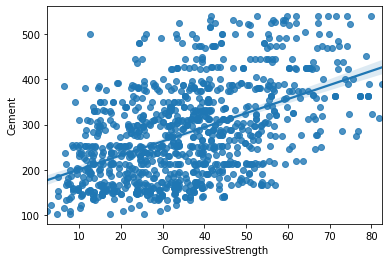

In [91]:
sns.regplot(x=concrete['CompressiveStrength'],y=concrete['Cement'])

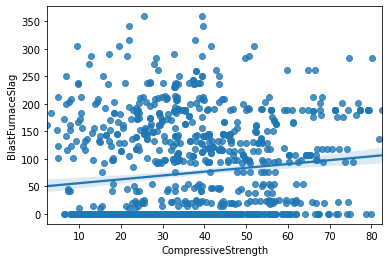

In [92]:
sns.regplot(x=concrete['CompressiveStrength'], y=concrete['BlastFurnaceSlag']);

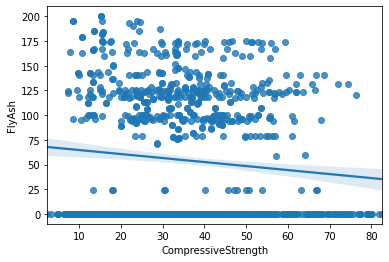

In [93]:
sns.regplot(x=concrete['CompressiveStrength'],y=concrete['FlyAsh']);


<AxesSubplot:xlabel='CompressiveStrength', ylabel='Water'>

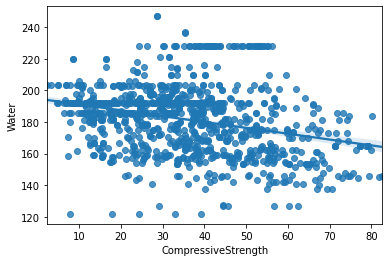

In [94]:
sns.regplot(x=concrete['CompressiveStrength'],y=concrete['Water'])

In [95]:
concrete.columns

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age', 'CompressiveStrength'],
      dtype='object')

<AxesSubplot:xlabel='CompressiveStrength', ylabel='Superplasticizer'>

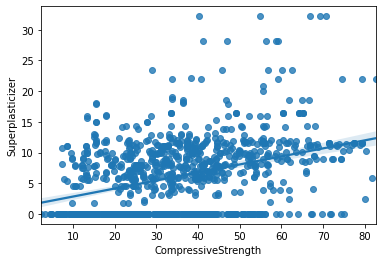

In [96]:
sns.regplot(x=concrete['CompressiveStrength'],y=concrete['Superplasticizer'])

<AxesSubplot:xlabel='CompressiveStrength', ylabel='CoarseAggregate'>

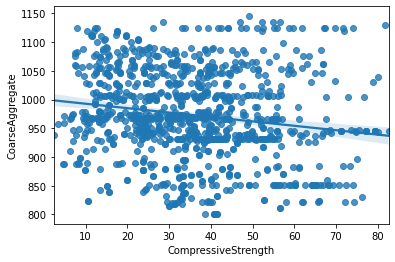

In [97]:
sns.regplot(x=concrete['CompressiveStrength'],y=concrete['CoarseAggregate'])

<AxesSubplot:xlabel='CompressiveStrength', ylabel='FineAggregate'>

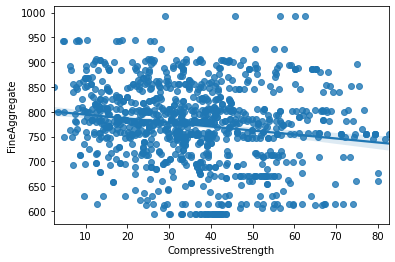

In [98]:
sns.regplot(x=concrete['CompressiveStrength'],y=concrete['FineAggregate'])

<AxesSubplot:xlabel='CompressiveStrength', ylabel='Age'>

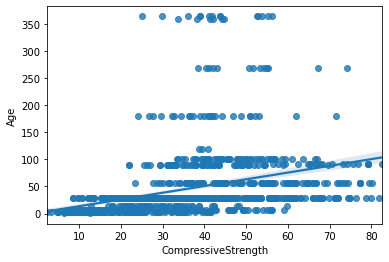

In [99]:
sns.regplot(x=concrete['CompressiveStrength'],y=concrete['Age'])

In [100]:
# Multicolinearity : The feature should not be correlated. If they will be then it will give raise to high variance and thus poor performance

In [101]:
concrete_without_CS = concrete.drop('CompressiveStrength',1)

corr = np.corrcoef(concrete_without_CS,rowvar=0) # correlation matrix

w, v = np.linalg.eig(corr) # eigen values and eigen vectors

In [102]:
print(w)

[2.28009936 0.03004278 0.17784169 1.4160748  1.34007903 0.79019547
 0.95150799 1.01415887]


In [103]:
# Residual should be normal with mean of 0

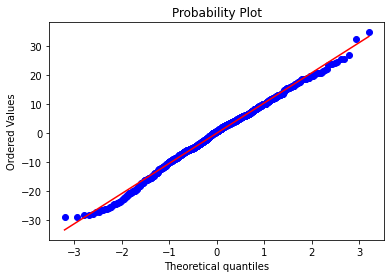

In [104]:
import pylab
import scipy.stats as stats
stats.probplot(y-predictions,dist='norm',plot=pylab);

In [105]:
# Heterodeskacity : Unequal variance in the error terms. By plotting predicted value vs the residuals. 

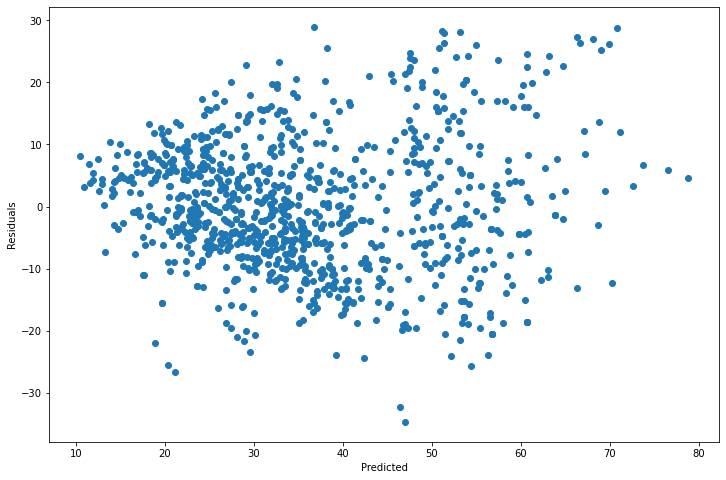

In [106]:
plt.figure(figsize=(12,8))
plt.plot(predictions,predictions-y,'o');
plt.xlabel(r'Predicted')
plt.ylabel(r'Residuals')
plt.show()

# Now with sklearn

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [108]:
concrete.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
BlastFurnaceSlag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
FlyAsh,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
CoarseAggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
FineAggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
CompressiveStrength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [109]:
X = concrete[['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer','CoarseAggregate','FineAggregate', 'Age']]
y = concrete['CompressiveStrength']

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=420)

In [111]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [112]:
coefficient = pd.DataFrame(regressor.coef_, X.columns,columns=['Coeff'])

In [113]:
coefficient

,Coeff
Cement,0.117865
BlastFurnaceSlag,0.104820
FlyAsh,0.087833
Water,-0.138134
Superplasticizer,0.321962
CoarseAggregate,0.021421
FineAggregate,0.024220
Age,0.111384


In [114]:
# For the model with statsmodel
model.params

const              -23.331214
Cement               0.119804
BlastFurnaceSlag     0.103866
FlyAsh               0.087934
Water               -0.149918
Superplasticizer     0.292225
CoarseAggregate      0.018086
FineAggregate        0.020190
Age                  0.114222
dtype: float64

In [115]:
y_pred = regressor.predict(X_test)

In [116]:
# Get the actual and predicted
df_regressor_true_predict = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [117]:
df_regressor_true_predict['residual'] = df_regressor_true_predict['Predicted'] - df_regressor_true_predict['Actual']

In [118]:
# evaluating the metrics

# Mean Absolute Error : Absolute difference between the predictions and actual
# Mean Squared Error : Squared of MAE
# Root Mean Sqaured Error : Sqaured and then root of error (prediction - actual). Gives more weight to large error.



In [119]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [120]:
print('Mean Absolute Error: ' ,mean_absolute_error(y_test,y_pred))
print('Mean Squared Error : ', mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error :' , np.sqrt(mean_squared_error(y_test,y_pred)))
print('R Sqaure :', r2_score(y_test,y_pred))

Mean Absolute Error:  8.263245579835447
Mean Squared Error :  102.44693368341548
Root Mean Squared Error : 10.121607267791784
R Sqaure : 0.6743574328849791


In [121]:
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     CompressiveStrength   R-squared:                       0.616
Model:                             OLS   Adj. R-squared:                  0.613
Method:                  Least Squares   F-statistic:                     204.3
Date:                 Wed, 30 Dec 2020   Prob (F-statistic):          6.29e-206
Time:                         19:28:20   Log-Likelihood:                -3869.0
No. Observations:                 1030   AIC:                             7756.
Df Residuals:                     1021   BIC:                             7800.
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -23.3312   

In [122]:
# We got lower R Square in statsmodel then sklearn

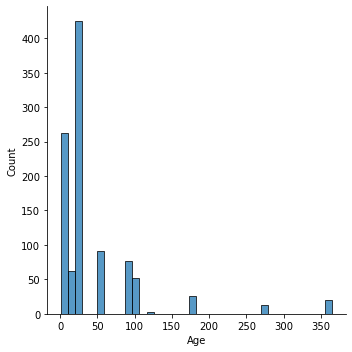

In [123]:
sns.displot(concrete['Age'])

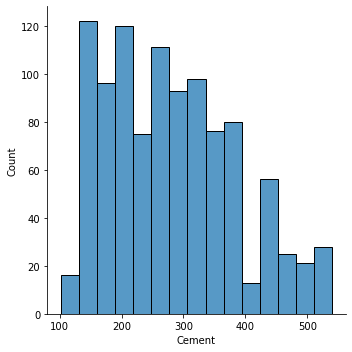

In [124]:
sns.displot(concrete['Cement'])

In [125]:
# We will make categorical variable from the Age and Cement

In [126]:
# bin label for age into 4 parts
bin_label_age = ['First','Second','Third','Fourth']
concrete['AGE_LEVELS'] = pd.qcut(concrete['Age'],q=4,labels=bin_label_age)

In [127]:
# bin label for cement into 4 parts
bin_label_cement = ['First','Second','Third','Fourth']
concrete['CEMENT_LEVELS'] = pd.qcut(concrete['Cement'],q=4,labels=bin_label_cement)

In [128]:
concrete.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength,AGE_LEVELS,CEMENT_LEVELS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,Second,Fourth
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,Second,Fourth
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,Fourth,Third
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,Fourth,Third
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,Fourth,Second


In [129]:
# Preprocessing data with following

# Missing values : Imputing numerical values with mean and categorical values with mode


In [130]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Cement               1030 non-null   float64 
 1   BlastFurnaceSlag     1030 non-null   float64 
 2   FlyAsh               1030 non-null   float64 
 3   Water                1030 non-null   float64 
 4   Superplasticizer     1030 non-null   float64 
 5   CoarseAggregate      1030 non-null   float64 
 6   FineAggregate        1030 non-null   float64 
 7   Age                  1030 non-null   int64   
 8   CompressiveStrength  1030 non-null   float64 
 9   AGE_LEVELS           1030 non-null   category
 10  CEMENT_LEVELS        1030 non-null   category
dtypes: category(2), float64(8), int64(1)
memory usage: 74.9 KB


In [131]:
X = concrete.drop('CompressiveStrength',1)
y = concrete['CompressiveStrength']

numeric_features = X.select_dtypes(include=['float64','int64']).columns
categorical_features = X.select_dtypes(include=['category','object']).columns

In [132]:
numeric_features, categorical_features

(Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
        'CoarseAggregate', 'FineAggregate', 'Age'],
       dtype='object'),
 Index(['AGE_LEVELS', 'CEMENT_LEVELS'], dtype='object'))

In [133]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [134]:
numerics_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median'))
])

preprocessor = ColumnTransformer(
                transformers=[
                    ('num',numerics_transformer,numeric_features)
                ]
)

In [135]:
clf = Pipeline(steps=[('preprocces',preprocessor),('linear_regression',LinearRegression())])

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=420)

In [137]:
clf.fit(X_train,y_train)

Pipeline(steps=[('preprocces',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age'],
      dtype='object'))])),
                ('linear_regression', LinearRegression())])

In [138]:
y_pred = clf.predict(X_test)

In [139]:
print("Mean Absolute Error :", mean_absolute_error(y_test,y_pred))
print("Root Mean Sqaure Error :", np.sqrt(mean_squared_error(y_test,y_pred)))
print("R Sqaure Value :", r2_score(y_test,y_pred))

Mean Absolute Error : 8.263245579835447
Root Mean Sqaure Error : 10.121607267791784
R Sqaure Value : 0.6743574328849791


In [140]:
# Still no improvement

In [141]:
# Let's see if we can improve it with categor polynomial feature

In [142]:
from sklearn.preprocessing import PolynomialFeatures

In [143]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('poly',PolynomialFeatures(degree=2))
])

categorical_transformer = Pipeline(steps=[
    ('onehot',OneHotEncoder(handle_unknown='ignore')),
    ('imputer',SimpleImputer(strategy='most_frequent'))
])

preprocessor = ColumnTransformer(
                    transformers=[('num',numeric_transformer,numeric_features),
                                  ('cat',categorical_transformer,categorical_features)]

)

In [144]:
clf = Pipeline(steps=[('preprocess',preprocessor),('linear_regression',LinearRegression())])

In [145]:
clf.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('poly',
                                                                   PolynomialFeatures())]),
                                                  Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('imputer',
                                            

In [146]:
y_pred = clf.predict(X_test)

In [147]:
print('Mean absolute error: ', mean_absolute_error(y_test,y_pred))
print('Root Mean Sqaure Error :', np.sqrt(mean_squared_error(y_test,y_pred)))
print('R Squre', r2_score(y_test,y_pred))

Mean absolute error:  5.06310915740221
Root Mean Sqaure Error : 6.570683354358339
R Squre 0.8627655067222337


In [148]:
# Much better improvement

In [149]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="median")),
    ('scaling', StandardScaler()),
    ('poly',PolynomialFeatures(degree=3,interaction_only=True))
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('imputer', SimpleImputer(strategy="most_frequent"))
])

In [150]:
preprocessor = ColumnTransformer(transformers=[
    ('num',numeric_transformer,numeric_features),
    ('cat',categorical_transformer,categorical_features)
])

In [151]:
clf = Pipeline(steps=[('pre',preprocessor),('linear',LinearRegression())])

In [152]:
clf.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=3,
                                                                                      interaction_only=True))]),
                                                  Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age'],
      dtype='object')),
                                                 ('cat',
                                 

In [153]:
y_pred = clf.predict(X_test)

In [154]:
print('Mean Absolute Error :', mean_absolute_error(y_test,y_pred))
print('Root Mean Sqaure Error :', np.sqrt(mean_squared_error(y_test,y_pred)))
print('R Sqaure :', r2_score(y_test,y_pred))

Mean Absolute Error : 4.517213288834951
Root Mean Sqaure Error : 5.962514722301044
R Sqaure : 0.8869940958645499


## With Tensorflow

In [157]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [158]:
print(tf.__version__)

2.3.1


In [163]:
# We will perform both imputation and regularization on the X_train dataset but not on X_test

In [173]:
concrete.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength,AGE_LEVELS,CEMENT_LEVELS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,Second,Fourth
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,Second,Fourth
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,Fourth,Third
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,Fourth,Third
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,Fourth,Second


In [174]:
concrete_1 = concrete.drop(['AGE_LEVELS','CEMENT_LEVELS'],axis=1)

In [342]:
train_dataset = concrete_1.sample(frac=0.8)
test_dataset = concrete_1.drop(train_dataset.index)

In [343]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('CompressiveStrength')
test_labels = test_features.pop('CompressiveStrength')

In [344]:
print(train_dataset.describe().transpose()[['mean','std']])

                           mean         std
Cement               281.662257  104.011516
BlastFurnaceSlag      73.631432   86.404466
FlyAsh                54.495510   63.795065
Water                181.569296   21.182385
Superplasticizer       6.207767    5.855636
CoarseAggregate      972.323786   77.525802
FineAggregate        773.720510   80.751750
Age                   45.257282   62.534107
CompressiveStrength   35.710595   16.885265


In [221]:
normalizer = preprocessing.Normalization()

In [222]:
normalizer.adapt(np.array(train_features))

In [224]:
age = np.array(train_features['Age'])

age_normalizer = preprocessing.Normalization(input_shape=[1,])

age_normalizer.adapt(age)

In [225]:
# first set up the architecture

age_model = tf.keras.Sequential([
    age_normalizer,
    layers.Dense(units=1)
])

age_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_5 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [226]:
# Now we will compile the model

# Compile means setting up the optimizer and loss functions

age_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error'

)

In [227]:
# Now we will run our model with fit function

history = age_model.fit(
            train_features['Age'],train_labels,
            epochs=200,
            verbose=0,
            validation_split=0.1)

In [228]:
# visulaize the model's training progress from the history

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
195,12.441590,13.706031,195
196,12.439314,13.705990,196
197,12.436497,13.707959,197
198,12.434077,13.714573,198
199,12.431664,13.721587,199


In [232]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0,40])
    plt.xlabel('Epoch')
    plt.ylabel('Error [Age]')
    plt.legend()
    plt.grid(True)

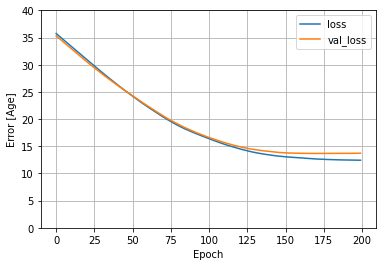

In [233]:
plot_loss(history)

In [234]:
test_result = {}

test_result['age_model'] = age_model.evaluate(
        test_features['Age'],
        test_labels,
        verbose=0

)

In [248]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

linear_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_4 (Normalizati (None, 8)                 17        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 26
Trainable params: 9
Non-trainable params: 17
_________________________________________________________________


In [249]:
linear_model.layers[1].kernel

<tf.Variable 'dense_5/kernel:0' shape=(8, 1) dtype=float32, numpy=
array([[ 0.42709863],
       [-0.73100567],
       [-0.41558263],
       [ 0.07543421],
       [ 0.51076245],
       [ 0.41643095],
       [-0.62828463],
       [ 0.68587446]], dtype=float32)>

In [250]:
linear_model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='mean_absolute_error'

)

In [251]:
history = linear_model.fit(
            train_features,train_labels,
            verbose=0,
            epochs=100,
            validation_split=0.2

)

In [252]:
hist = pd.DataFrame(history.history)

,loss,val_loss
95,33.969543,33.170414
96,33.948380,33.149773
97,33.927223,33.129345
98,33.906010,33.108803
99,33.884922,33.088379


In [253]:
hist.head()

,loss,val_loss
0,35.976398,35.119064
1,35.954887,35.098602
2,35.933762,35.078186
3,35.913044,35.057812
4,35.891479,35.037075


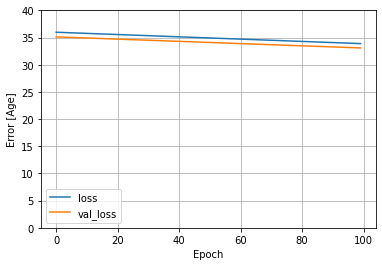

In [254]:
plot_loss(history)

In [256]:
test_result['linear_models'] = linear_model.evaluate(test_features,test_labels,verbose=1)

7/7 [==============================] - 0s 593us/step - loss: 33.6679


In [257]:
test_result

{'age_model': 12.608766555786133, 'linear_models': 33.66794204711914}

## Deep Neural Network

In [258]:
# This model will contain following

# Normalization layer
# Hidden Layers
# Single Output Layers

In [346]:
dnn_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(128, kernel_initializer='normal',activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1)
]
)

In [347]:
dnn_model.compile(
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                loss='mean_absolute_error'

)

In [348]:
history = dnn_model.fit(
                train_features,train_labels,
                verbose=0,
                validation_split=0.2,
                epochs=100

)

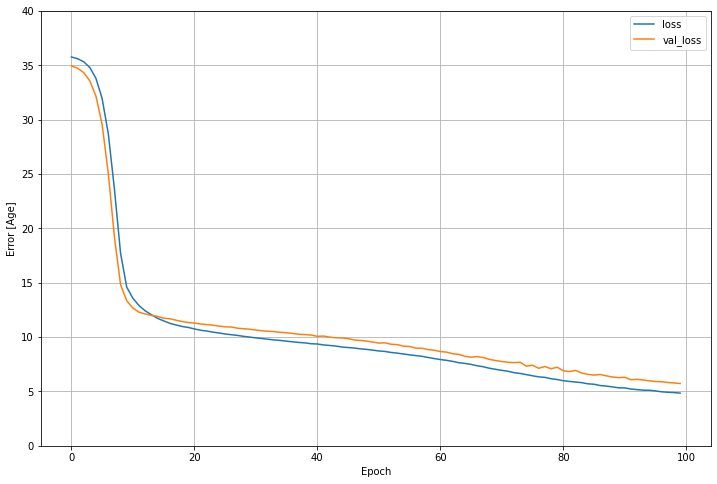

In [349]:
plt.figure(figsize=(12,8))
plot_loss(history)

In [350]:
test_result['dnn_model'] = dnn_model.evaluate(test_features,test_labels,verbose=0)

In [351]:
test_result

{'age_model': 12.608766555786133,
 'linear_models': 33.66794204711914,
 'dnn_model': 5.619548797607422}

In [352]:
import tensorflow_addons as tfa
from tensorflow_addons import metrics

In [353]:
actuals = test_labels

In [354]:
predicted = pd.Series(dnn_model.predict(test_features).flatten())

In [355]:
result = tfa.metrics.RSquare()

In [356]:
result.update_state(actuals,predicted)

In [357]:
print("The R Sqaure value for DNN Model is : ", result.result().numpy())

The R Sqaure value for DNN Model is :  0.74493587
